### 0. Імпорти бібліотек


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

### 1) Завантажити дані, вивести назви колонок і розмір датасета

In [38]:
df = pd.read_csv('1234.csv', na_values=['NA'], usecols=[
    'name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'
])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


### 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [39]:
df_cleaned = df.dropna()
df_cleaned

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [40]:
df_pricing = df_cleaned.iloc[:, [1,2,3]]
threshold = 500000
def assign_value(price):
    return 1 if price < threshold else 2

df_pricing['pricing_tag'] = df_pricing['selling_price'].apply(assign_value)
df_pricing['pricing_tag'] = np.where(df_pricing['selling_price'] < threshold, 1, 2)

df_pricing


C:\Users\roco\AppData\Local\Temp\ipykernel_7188\1034731403.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pricing['pricing_tag'] = df_pricing['selling_price'].apply(assign_value)
C:\Users\roco\AppData\Local\Temp\ipykernel_7188\1034731403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pricing['pricing_tag'] = np.where(df_pricing['selling_price'] < threshold, 1, 2)


,year,selling_price,km_driven,pricing_tag
0,2007,60000,70000,1
1,2007,135000,50000,1
2,2012,600000,100000,2
3,2017,250000,46000,1
4,2014,450000,141000,1
...,...,...,...,...
4335,2014,409999,80000,1
4336,2014,409999,80000,1
4337,2009,110000,83000,1
4338,2016,865000,90000,2


### 3) Візуалізувати дані: 

побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); 

побудувати гістограми розподілу ознак відносно цільової змінної 

побудувати boxplot-и ознак відносно цільової змінної 

(якщо ознак занадто багато обмежитися декількома)

### Heatmap 

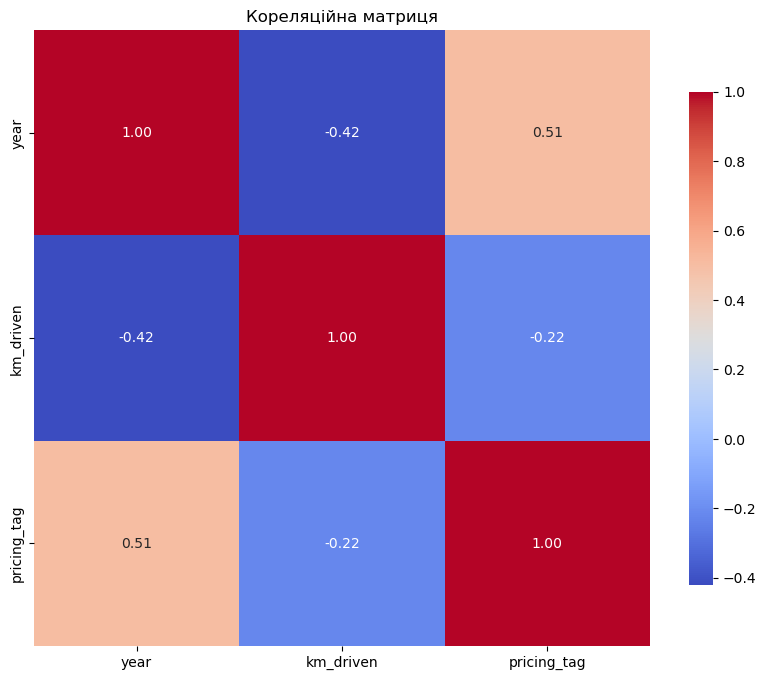

In [41]:
df_pricing = df_pricing.drop(['selling_price'],axis = 1)
correlation_matrix = df_pricing.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Кореляційна матриця')
plt.show()

feature_names = ['year', 'km_driven']

### Boxpot-и


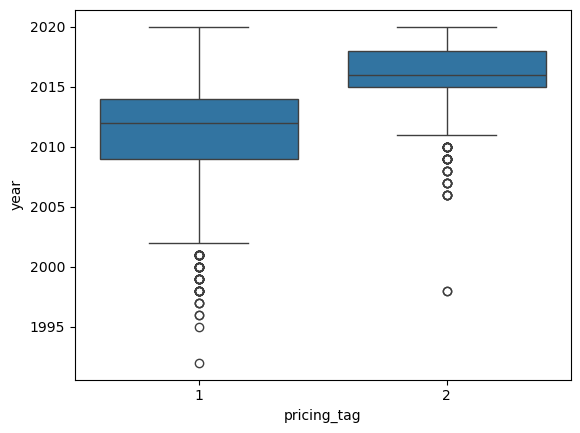

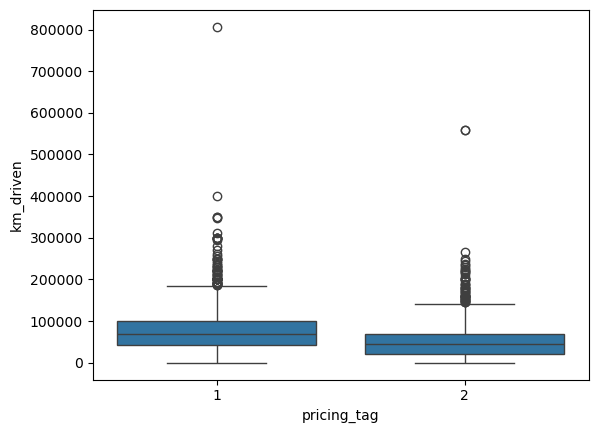

In [42]:
for i in range(len(feature_names)):
    figure = plt.figure()
    ax = sns.boxplot(x='pricing_tag', y=feature_names[i], data=df_pricing)

### Гістограми

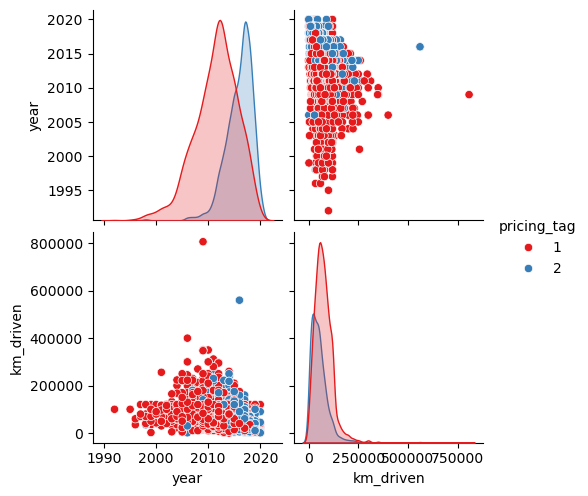

In [43]:
sns.pairplot(df_pricing, hue="pricing_tag", palette = 'Set1')

### 4) Нормалізувати дані

In [44]:
from sklearn.preprocessing import StandardScaler


X = df_pricing.drop(['pricing_tag'], axis = 1)
y = df_pricing['pricing_tag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 5) Провести навчання наступних класифікаторів:

• kNN

• дерево ухвалення рішень

• SVM

• Random Forest

• AdaBoost

Підібрати оптимальні параметри

• для kNN

• для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

### kNN


In [45]:
error_rate = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

k_optimal = np.argmin(error_rate) + 1

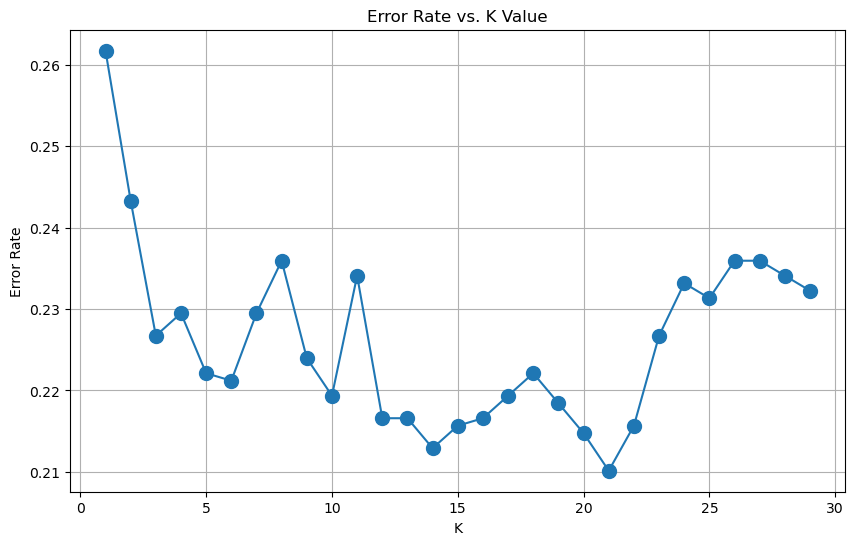

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [47]:
print(f"Оптимальний параметр k для kNN: {k_optimal}")

Оптимальний параметр k для kNN: 21


In [48]:
knn = KNeighborsClassifier(n_neighbors=k_optimal)

knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)

print(confusion_matrix(y_test, knn_prediction))
print()
print(classification_report(y_test, knn_prediction))

[[594 122]
 [106 263]]

              precision    recall  f1-score   support

           1       0.85      0.83      0.84       716
           2       0.68      0.71      0.70       369

    accuracy                           0.79      1085
   macro avg       0.77      0.77      0.77      1085
weighted avg       0.79      0.79      0.79      1085



### Дерево ухвалення рішень

In [49]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

tree_prediction = tree.predict(X_test)

print(confusion_matrix(y_test, tree_prediction))
print()
print(classification_report(y_test, tree_prediction))


[[579 137]
 [110 259]]

              precision    recall  f1-score   support

           1       0.84      0.81      0.82       716
           2       0.65      0.70      0.68       369

    accuracy                           0.77      1085
   macro avg       0.75      0.76      0.75      1085
weighted avg       0.78      0.77      0.77      1085



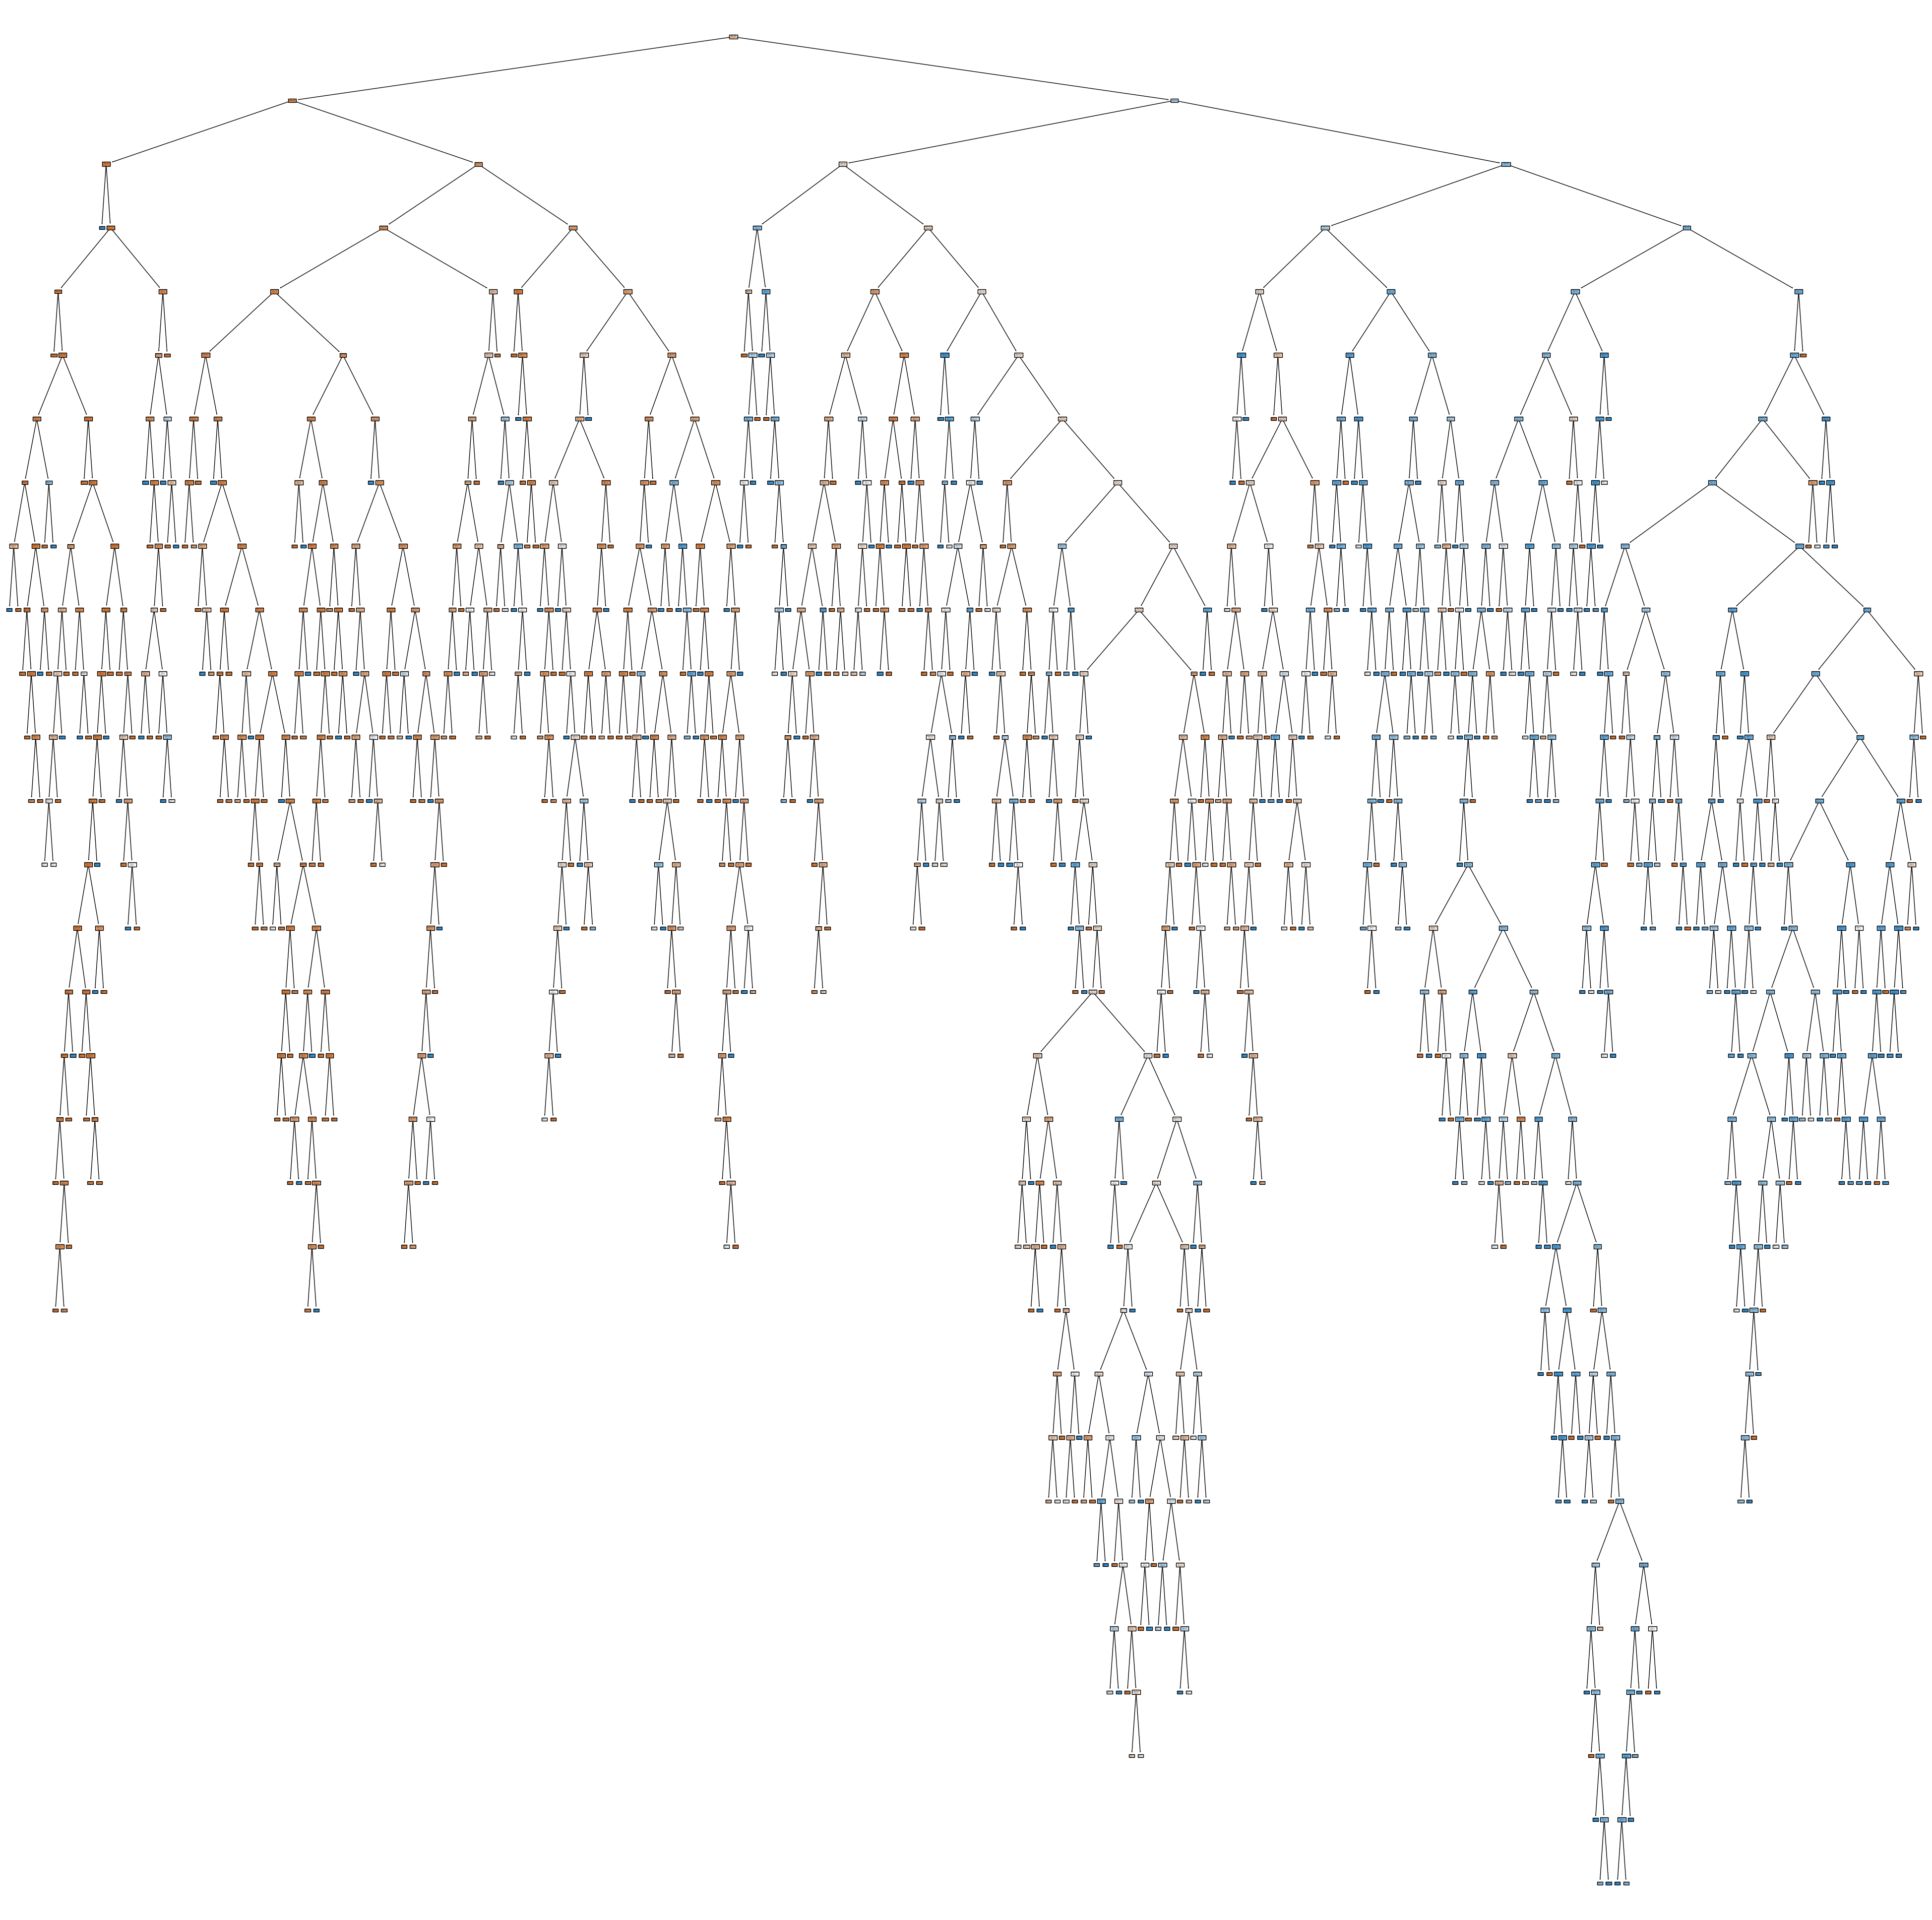

In [50]:
plt.figure(figsize = (50, 50))
plot_tree(tree, feature_names=feature_names, 
          class_names=['1','2'], filled = True)
plt.show()

### SVM

In [51]:
param_grid = {'C'      : [0.1, 1, 10, 100, 1000],
              'gamma'  : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [52]:
print(f"Оптимальні параметри для SVM: {grid.best_params_}") 

Оптимальні параметри для SVM: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [53]:
svc_prediction = grid.predict(X_test)
print(confusion_matrix(y_test, svc_prediction))
print()
print(classification_report(y_test, svc_prediction))

[[590 126]
 [135 234]]

              precision    recall  f1-score   support

           1       0.81      0.82      0.82       716
           2       0.65      0.63      0.64       369

    accuracy                           0.76      1085
   macro avg       0.73      0.73      0.73      1085
weighted avg       0.76      0.76      0.76      1085



### Random Forest

In [54]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

rf_pred = forest.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print()
print(classification_report(y_test, rf_pred))

[[570 146]
 [ 96 273]]

              precision    recall  f1-score   support

           1       0.86      0.80      0.82       716
           2       0.65      0.74      0.69       369

    accuracy                           0.78      1085
   macro avg       0.75      0.77      0.76      1085
weighted avg       0.79      0.78      0.78      1085



### AdaBoost


In [55]:
ada = AdaBoostClassifier(algorithm='SAMME')
ada.fit(X_train, y_train)

ada_pediction = ada.predict(X_test)

print(confusion_matrix(y_test, ada_pediction))
print()
print(classification_report(y_test, ada_pediction))

[[479 237]
 [ 56 313]]

              precision    recall  f1-score   support

           1       0.90      0.67      0.77       716
           2       0.57      0.85      0.68       369

    accuracy                           0.73      1085
   macro avg       0.73      0.76      0.72      1085
weighted avg       0.78      0.73      0.74      1085



Висновки і вибір даних: у ході лабораторної роботи було вирішено відкинути усі дані, що не були початково задані у чисельному вигляді та класификівути ціну, що буде казати чи машина дорога/дешева (1/2). Навіть з обмеженими параметрами результати зважаючи виключно на рік випуску (купівлі) і кількість пройденого шлюху машиною вийшли достатньо точні. Колонку ціни було відкинуто, бо утворений клас було утворено за умови "ціна < x", і за умови її наявності ми б мали точність 99% (з об'єктивних причин).